In [1]:

# import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
data = pd.read_csv('cardata.csv')

In [3]:
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.drop('Car_Name', axis=1,inplace=True)


In [5]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
Age = []
for i in df.Year:
    Age.append(i - ((max(df.Year))+1))

In [8]:

df2 = pd.DataFrame({'Age' : np.abs(Age)})


In [9]:
df2.describe()

,Age
count,301.000000
mean,5.372093
std,2.891554
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,16.000000


In [10]:
df.insert(1, 'Age', df2)


In [11]:
df

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.describe()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,5.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,1.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,3.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,5.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,7.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,16.000000,35.000000,92.600000,500000.000000,3.000000


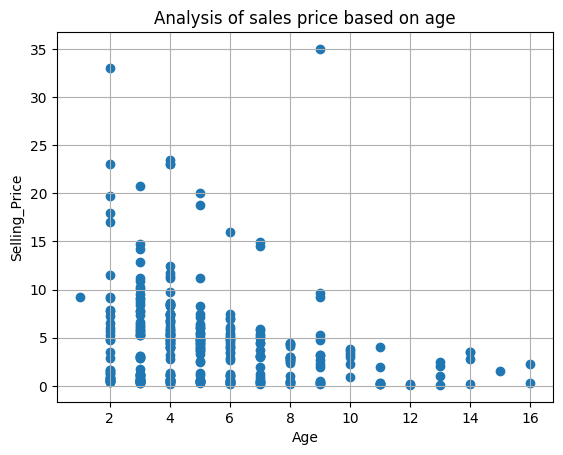

In [13]:
plt.title('Analysis of sales price based on age')
plt.scatter(df.Age, df.Selling_Price)
plt.xlabel('Age')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Age_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

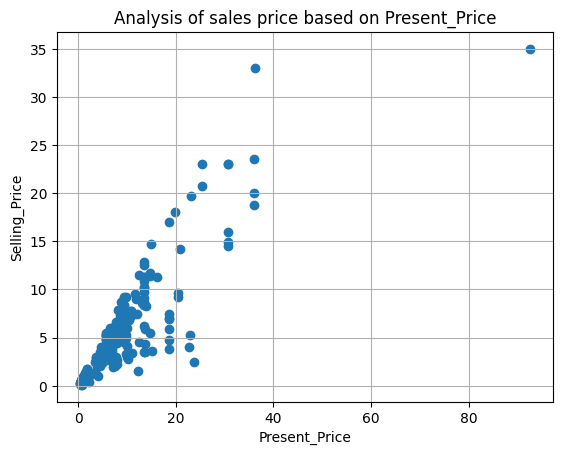

In [14]:
plt.title('Analysis of sales price based on Present_Price')
plt.scatter(df.Present_Price, df.Selling_Price)
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Present_Price_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

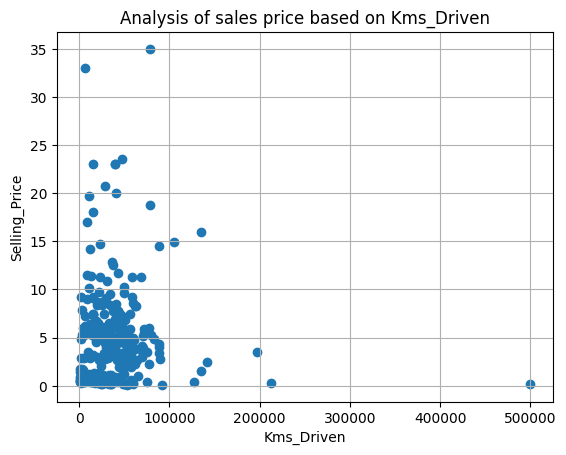

In [15]:
plt.title('Analysis of sales price based on Kms_Driven')
plt.scatter(df.Kms_Driven, df.Selling_Price)
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Kms_Driven_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

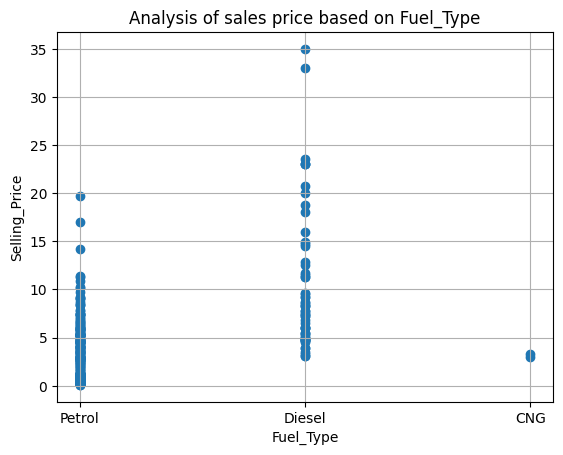

In [16]:
plt.title('Analysis of sales price based on Fuel_Type')
plt.scatter(df.Fuel_Type, df.Selling_Price)
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Fuel_Type_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

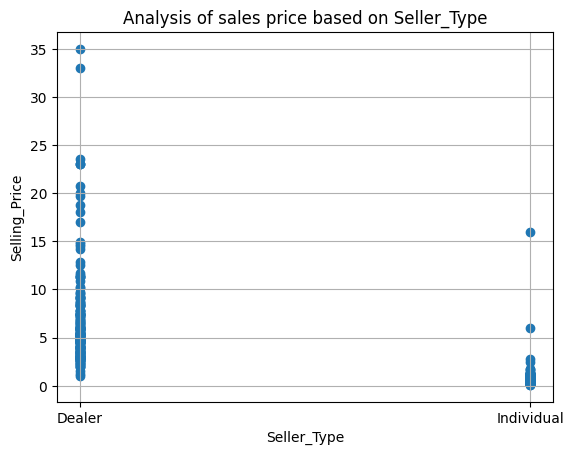

In [17]:
plt.title('Analysis of sales price based on Seller_Type')
plt.scatter(df.Seller_Type, df.Selling_Price)
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Seller_Type_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

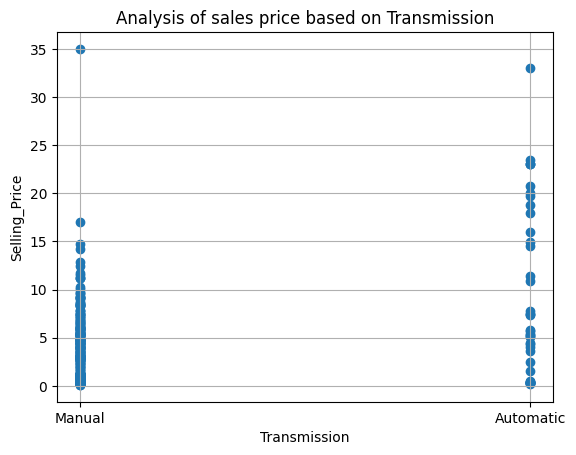

In [18]:
plt.title('Analysis of sales price based on Transmission')
plt.scatter(df.Transmission, df.Selling_Price)
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Transmission_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

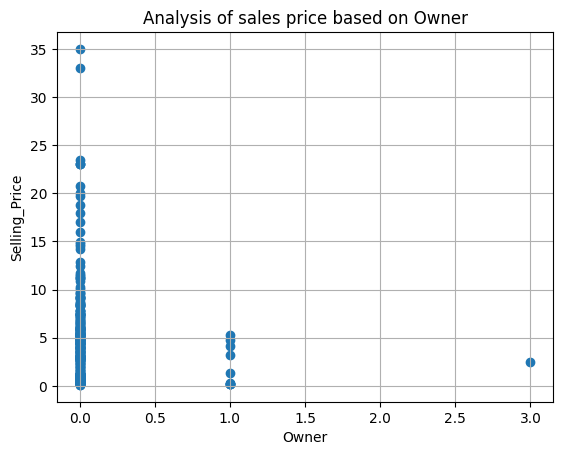

In [19]:
plt.title('Analysis of sales price based on Owner')
plt.scatter(df.Owner, df.Selling_Price)
plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Owner_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

In [20]:
set(df.Seller_Type)

{'Dealer', 'Individual'}

In [21]:
set(df.Transmission)

{'Automatic', 'Manual'}

In [22]:
set(df.Fuel_Type)

{'CNG', 'Diesel', 'Petrol'}

In [23]:
df.describe()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,5.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,1.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,3.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,5.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,7.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,16.000000,35.000000,92.600000,500000.000000,3.000000


In [24]:
df_drop = df[df['Selling_Price']> 25]
df.nlargest(5, columns='Selling_Price')

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,2010,9,35.0,92.60,78000,Diesel,Dealer,Manual,0
64,2017,2,33.0,36.23,6000,Diesel,Dealer,Automatic,0
63,2015,4,23.5,35.96,47000,Diesel,Dealer,Automatic,0
51,2015,4,23.0,30.61,40000,Diesel,Dealer,Automatic,0
82,2017,2,23.0,25.39,15000,Diesel,Dealer,Automatic,0


In [25]:
df.drop(64, inplace=True)

In [26]:
df.drop(86, inplace=True)

In [27]:
df_drop = df[df['Kms_Driven']> 400000]
df.nlargest(10, columns='Kms_Driven')

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,2008,11,0.17,0.52,500000,Petrol,Individual,Automatic,0
179,2010,9,0.31,1.05,213000,Petrol,Individual,Manual,0
84,2005,14,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,2006,13,2.50,23.73,142000,Petrol,Individual,Automatic,3
77,2004,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0
53,2013,6,16.00,30.61,135000,Diesel,Individual,Automatic,0
37,2003,16,0.35,2.28,127000,Petrol,Individual,Manual,0
50,2012,7,14.90,30.61,104707,Diesel,Dealer,Automatic,0
200,2006,13,0.10,0.75,92233,Petrol,Individual,Manual,0
54,2005,14,2.75,10.21,90000,Petrol,Individual,Manual,0


In [28]:
df.drop(196, inplace=True)

In [29]:
df.drop(179, inplace=True)

In [30]:
# df.drop(84, inplace=True)

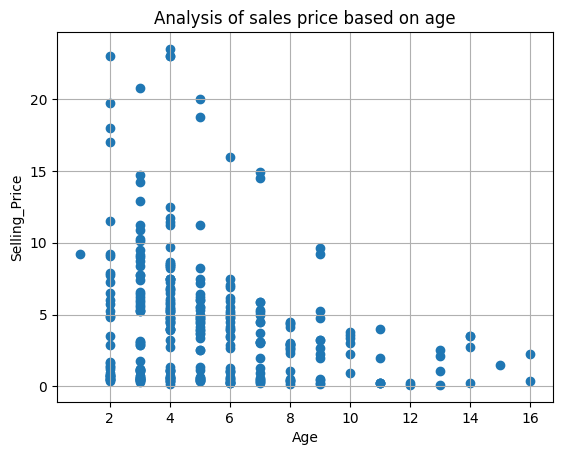

In [31]:
plt.title('Analysis of sales price based on age')
plt.scatter(df.Age, df.Selling_Price)
plt.xlabel('Age')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Age_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

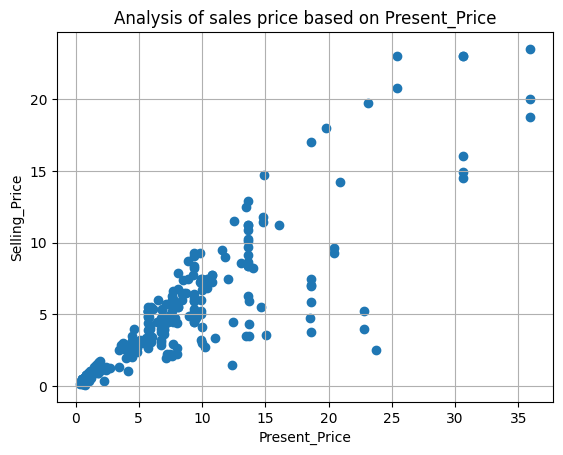

In [32]:
plt.title('Analysis of sales price based on Present_Price')
plt.scatter(df.Present_Price, df.Selling_Price)
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Present_Price_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

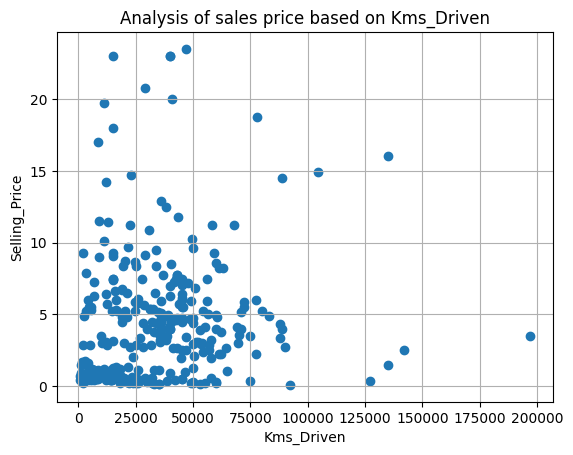

In [33]:
plt.title('Analysis of sales price based on Kms_Driven')
plt.scatter(df.Kms_Driven, df.Selling_Price)
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Kms_Driven_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

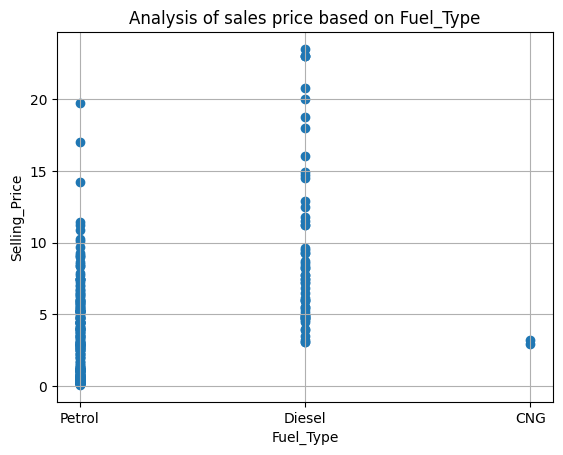

In [34]:
plt.title('Analysis of sales price based on Fuel_Type')
plt.scatter(df.Fuel_Type, df.Selling_Price)
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Fuel_Type_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

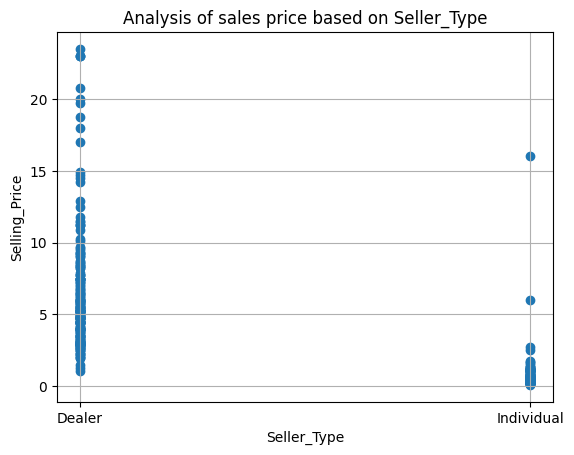

In [35]:
plt.title('Analysis of sales price based on Seller_Type')
plt.scatter(df.Seller_Type, df.Selling_Price)
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Seller_Type_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

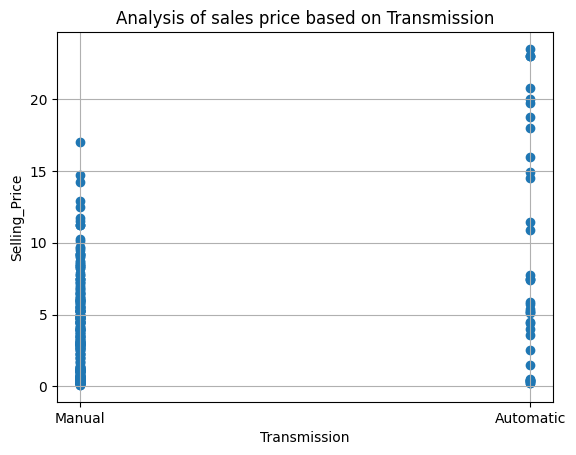

In [36]:
plt.title('Analysis of sales price based on Transmission')
plt.scatter(df.Transmission, df.Selling_Price)
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Transmission_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

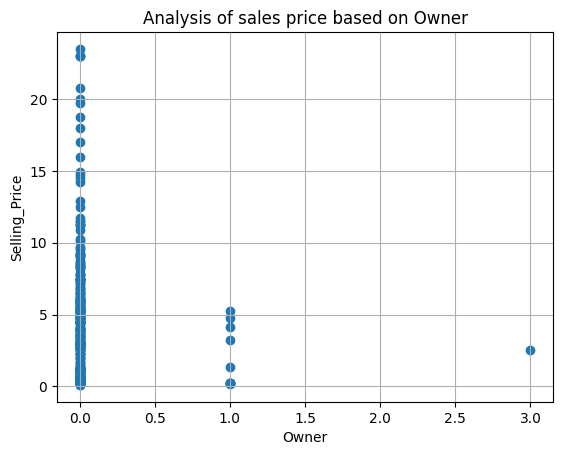

In [37]:
plt.title('Analysis of sales price based on Owner')
plt.scatter(df.Owner, df.Selling_Price)
plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Owner_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

In [38]:
df.replace('Dealer', 1, inplace=True)

In [39]:
df.replace('Individual', 0, inplace=True)

In [40]:
df.replace('Automatic', 1, inplace=True)

In [41]:
df.replace('Manual', 0, inplace=True)

In [42]:
df.replace('Petrol', 0, inplace=True)

In [43]:
df.replace('Diesel', 1, inplace=True)

In [44]:
df.replace('CNG', -1, inplace=True)

In [45]:
# df.drop('Year', axis=1, inplace=True)

In [46]:
Year2 = df.Year ** 2
Year3 = df.Year ** 3
Age2 = df.Age ** 2
Age3 = df.Age ** 3
Kms_Driven2 = df.Kms_Driven	 ** 2
Kms_Driven3 = df.Kms_Driven	 ** 3
SinAge = np.sin((2 * np.pi * df.Age) / 12 )
Transmission2 = df.Transmission ** 2
Transmission3 = df.Transmission ** 3
Present_Price2 = df.Present_Price ** 2
Present_Price3 = df.Present_Price ** 3
Fuel_Type3 = df.Fuel_Type ** 3
Fuel_Type5 = df.Fuel_Type ** 5
Owner2 = df.Owner ** 2
Owner3 = df.Owner ** 3

In [47]:
# df.insert(2, 'Year2', Year2)

In [48]:
# df.insert(2, 'Age2', Age2)
# df.insert(2, 'Age3', Age3)


# df.insert(5, 'Kms_Driven2', Kms_Driven2)
# df.insert(8, 'Kms_Driven3', km3)

# df.insert(11, 'Transmission2', Transmission2)
# df.insert(12, 'Transmission3', Transmission3)

# df.insert(4, 'Present_Price2', Present_Price2)
# df.insert(5, 'Present_Price3', Present_Price3)

# df.insert(9, 'Fuel_Type3', Fuel_Type3)
# # df.insert(10, 'Fuel_Type5', Fuel_Type5)

# df.insert(17, 'Owner2', Owner2)
# df.insert(18, 'Owner3', Owner3)

In [49]:
df

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,0,1,0,0
1,2013,6,4.75,9.54,43000,1,1,0,0
2,2017,2,7.25,9.85,6900,0,1,0,0
3,2011,8,2.85,4.15,5200,0,1,0,0
4,2014,5,4.60,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,1,1,0,0
297,2015,4,4.00,5.90,60000,0,1,0,0
298,2009,10,3.35,11.00,87934,0,1,0,0
299,2017,2,11.50,12.50,9000,1,1,0,0


In [50]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
normal = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal, columns=['Year','Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

In [51]:
X = pd.DataFrame(normal_df, columns=['Year', 'Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = pd.DataFrame(normal_df.Selling_Price).values.reshape(-1, 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [53]:
model = LinearRegression()

In [54]:
model_kf = KFold(10)

In [55]:
result_validation = cross_val_score(model, X_train, y_train, cv= model_kf)

In [56]:
result_validation

array([0.86910341, 0.22077528, 0.88480968, 0.80499372, 0.90516533,
       0.87502305, 0.92830689, 0.95229078, 0.8357087 , 0.71846728])

In [57]:
print(np.mean(result_validation))

0.7994644126369771


In [58]:
comp_Year_scores = np.corrcoef(normal_df.Year, normal_df.Selling_Price)
# comp_Year_scores


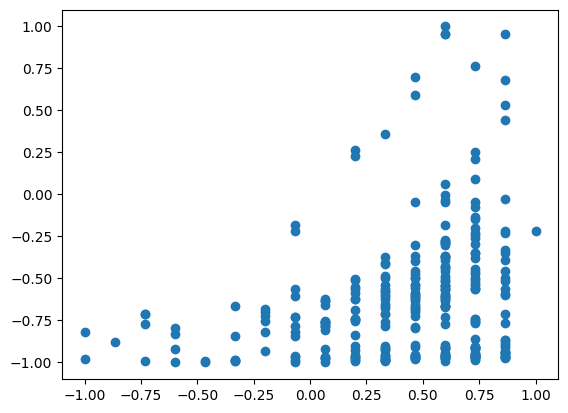

In [59]:
plt.scatter(normal_df.Year, normal_df.Selling_Price)

In [60]:
comp_Age_scores = np.corrcoef(normal_df.Age, normal_df.Selling_Price)
comp_Age_scores


array([[ 1.        , -0.26612254],
       [-0.26612254,  1.        ]])

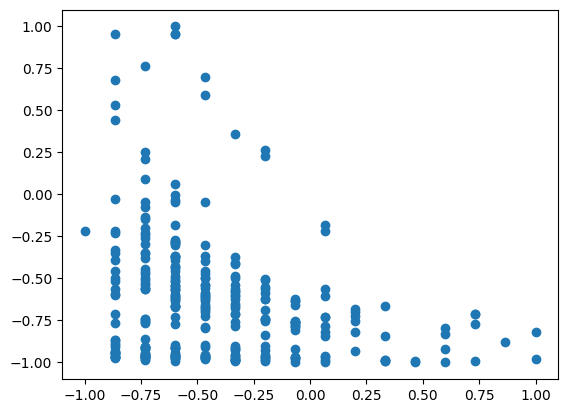

In [61]:
plt.scatter(normal_df.Age, normal_df.Selling_Price)

In [62]:
comp_Present_Price_scores = np.corrcoef(normal_df.Present_Price, normal_df.Selling_Price)
comp_Present_Price_scores


array([[1.        , 0.87964703],
       [0.87964703, 1.        ]])

In [63]:
comp_Kms_Driven_scores = np.corrcoef(normal_df.Kms_Driven, normal_df.Selling_Price)
comp_Kms_Driven_scores


array([[1.        , 0.11731136],
       [0.11731136, 1.        ]])

In [64]:
comp_Fuel_Type_scores = np.corrcoef(normal_df.Fuel_Type, normal_df.Selling_Price)
comp_Fuel_Type_scores


array([[1.        , 0.53496845],
       [0.53496845, 1.        ]])

In [65]:
comp_Seller_Type_scores = np.corrcoef(normal_df.Seller_Type, normal_df.Selling_Price)
comp_Seller_Type_scores

array([[1.        , 0.59066591],
       [0.59066591, 1.        ]])

In [66]:
comp_Transmission_scores = np.corrcoef(normal_df.Transmission, normal_df.Selling_Price)
comp_Transmission_scores

array([[1.        , 0.38836579],
       [0.38836579, 1.        ]])

In [67]:
comp_Owner_scores = np.corrcoef(normal_df.Owner, normal_df.Selling_Price)
comp_Owner_scores

array([[ 1.        , -0.09402943],
       [-0.09402943,  1.        ]])

In [68]:
model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
compare = pd.DataFrame({'actual' : y_pred.flatten(),
          'predict' : y_test.flatten()})


In [71]:
compare

,actual,predict
0,-0.887503,-0.910256
1,-1.032401,-0.982906
2,-0.984854,-0.970085
3,-0.610434,-0.670940
4,-0.671988,-0.623932
5,-0.205283,-0.196581
6,0.448343,0.764957
7,-0.613333,-0.568376
8,-0.679923,-0.752137
9,-0.624828,-0.559829


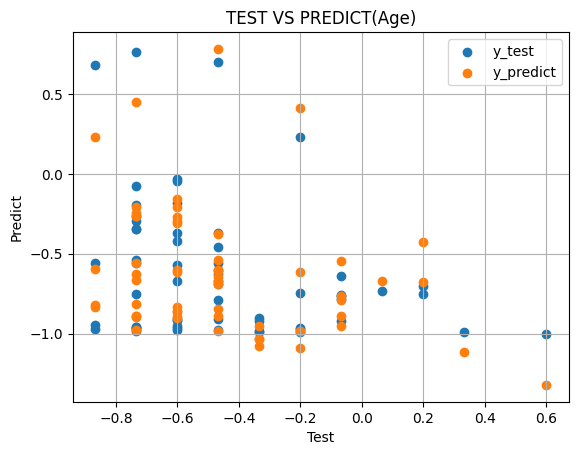

In [72]:
plt.title('TEST VS PREDICT(Age)')
plt.scatter(X_test.Age, y_test, label= 'y_test')
plt.scatter(X_test.Age, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_Age', bbox_inches='tight',pad_inches= 1 )
plt.show()


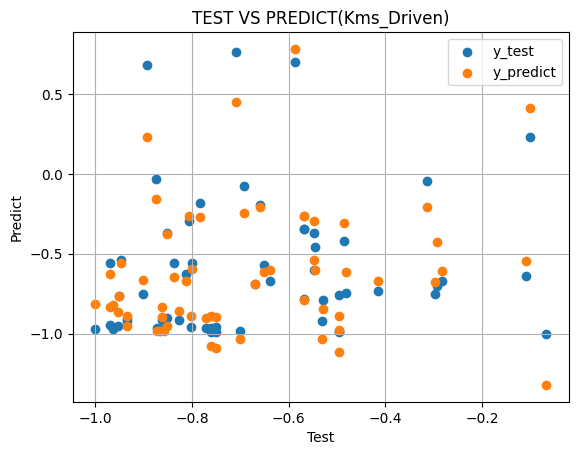

In [73]:
plt.title('TEST VS PREDICT(Kms_Driven)')
plt.scatter(X_test.Kms_Driven, y_test, label= 'y_test')
plt.scatter(X_test.Kms_Driven, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_km', bbox_inches= 'tight', pad_inches=1)
plt.show()

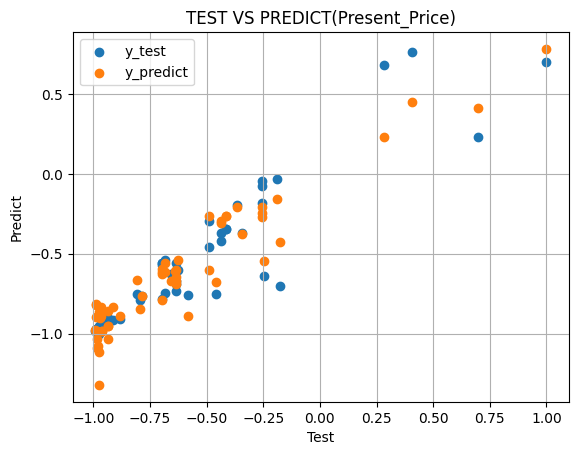

In [74]:
plt.title('TEST VS PREDICT(Present_Price)')
plt.scatter(X_test.Present_Price, y_test, label= 'y_test')
plt.scatter(X_test.Present_Price, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_present_price', bbox_inches='tight', pad_inches=1)
plt.show()

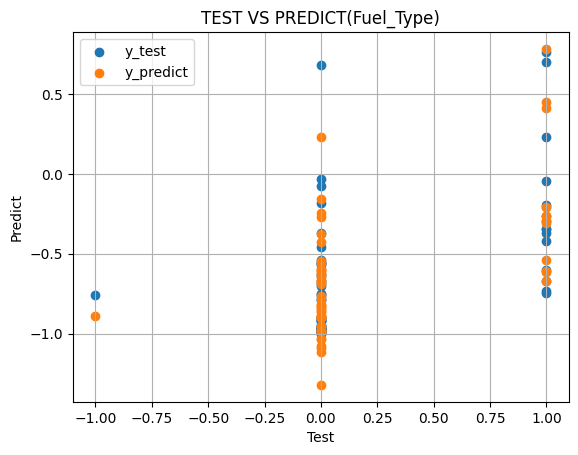

In [75]:
plt.title('TEST VS PREDICT(Fuel_Type)')
plt.scatter(X_test.Fuel_Type, y_test, label= 'y_test')
plt.scatter(X_test.Fuel_Type, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_fuel_type', bbox_inches='tight', pad_inches=1)
plt.show()

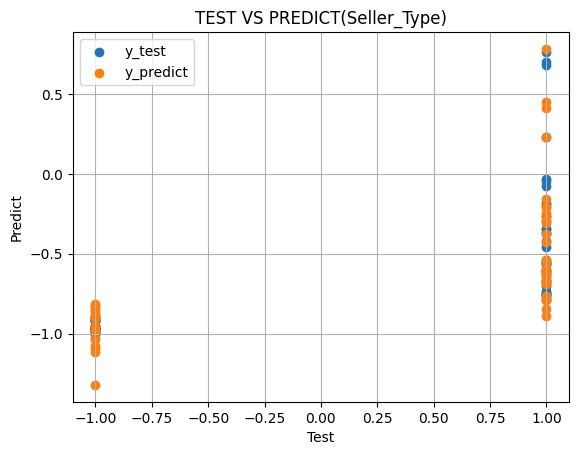

In [76]:
plt.title('TEST VS PREDICT(Seller_Type)')
plt.scatter(X_test.Seller_Type, y_test, label= 'y_test')
plt.scatter(X_test.Seller_Type, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_seller_type', bbox_inches='tight', pad_inches=1)
plt.show()

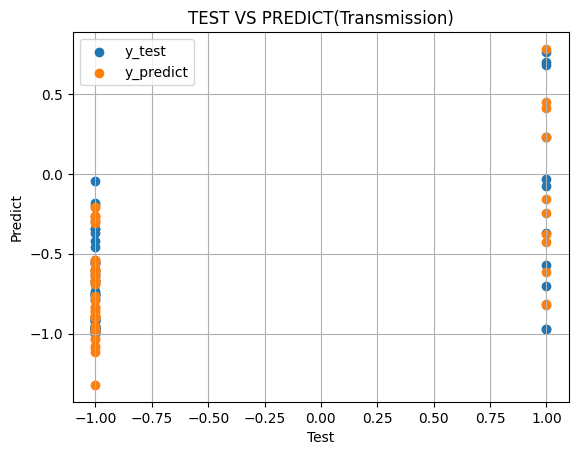

In [83]:
plt.title('TEST VS PREDICT(Transmission)')
plt.scatter(X_test.Transmission, y_test, label= 'y_test')
plt.scatter(X_test.Transmission, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.savefig('test_predict_transmission', bbox_inches='tight', pad_inches=1)
plt.grid()

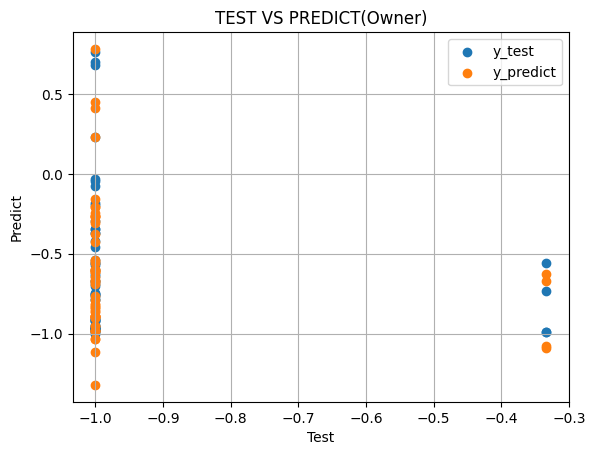

In [78]:
plt.title('TEST VS PREDICT(Owner)')
plt.scatter(X_test.Owner, y_test, label= 'y_test')
plt.scatter(X_test.Owner, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_owner', bbox_inches='tight', pad_inches=1)


In [79]:
df

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,0,1,0,0
1,2013,6,4.75,9.54,43000,1,1,0,0
2,2017,2,7.25,9.85,6900,0,1,0,0
3,2011,8,2.85,4.15,5200,0,1,0,0
4,2014,5,4.60,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,1,1,0,0
297,2015,4,4.00,5.90,60000,0,1,0,0
298,2009,10,3.35,11.00,87934,0,1,0,0
299,2017,2,11.50,12.50,9000,1,1,0,0


In [80]:
model.coef_

array([[ 1.49068230e+12,  1.49068230e+12,  7.83767700e-01,
        -2.40844727e-01,  1.73004150e-01,  3.45153809e-02,
         1.74865723e-02, -9.25903320e-02]])

In [81]:
model.intercept_

array([-0.49046948])

In [82]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2_Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error: 0.09125128982413529
Mean Squared Error: 0.015065909042761904
Root Mean Squared Error: 0.12274326475518689
R2_Score: 0.9164588994808497


R2_Score: 0.8540255365317553


R2_Score: 0.8886224039913444


R2_Score: 0.9034185591193427


R2_Score: 0.9166785128374881


R2_Score: 0.9031692747656203


R2_Score: 0.90844934705977


R2_Score: 0.9069000581295319


R2_Score: 0.8969572936456881


R2_Score: 0.9031254519465763


R2_Score: 0.9059720454175415


R2_Score: 0.9164588994808497